In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

C:\Users\kaila\AppData\Local\Temp\ipykernel_7300\3025608752.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv(r"C:\Users\kaila\Desktop\charan\Python EDA\CustomerChurn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#column names
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior Citizen is actually a categorical, hence 25-50-75% distribution is not proper
75% of the customers have tenure less than 55 months
25% of the customers paying more 90$ USD Per Month

In [7]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

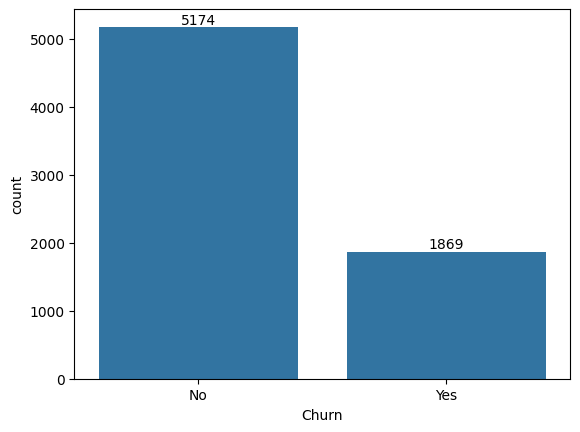

In [8]:
ax=sns.countplot(x='Churn', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [9]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

>Data is highly imbalanced ratio=73:27
>So we analyze the data with other features while taking the target values separetely to get some insights


In [10]:
#conscise summary of the df, 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#creating a copy of base data for manipulation and processing
new_df=df.copy()

In [12]:
new_df['TotalCharges']= pd.to_numeric(new_df['TotalCharges'],errors='coerce')

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
#pulling out all rows where total charges have null values
new_df.loc[new_df['TotalCharges'].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
#4) Missing Values Treatment
new_df.dropna(how='any',inplace = True)

In [17]:
new_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [19]:
#5)Dividing Customers based on the tenure
new_df['tenure'].max()

72

In [20]:
labels=["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
print(labels)


['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']


In [21]:
#creating bins
labels=["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
new_df['tenure_group']=pd.cut(new_df.tenure,bins=range(1,74,12),right= False,labels= labels)

In [22]:
new_df['tenure_group'].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [23]:
new_df['tenure_group'].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [24]:
#6 ) dropping columns:
new_df.drop(columns=['customerID','tenure'], axis=1, inplace= True)

In [25]:
new_df.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


DATA EXPLORATION
1> Plot distribution of individual predictors by churn

Univariate Analysis

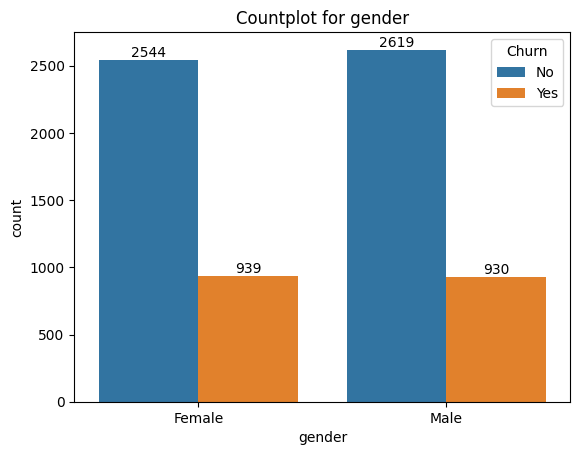

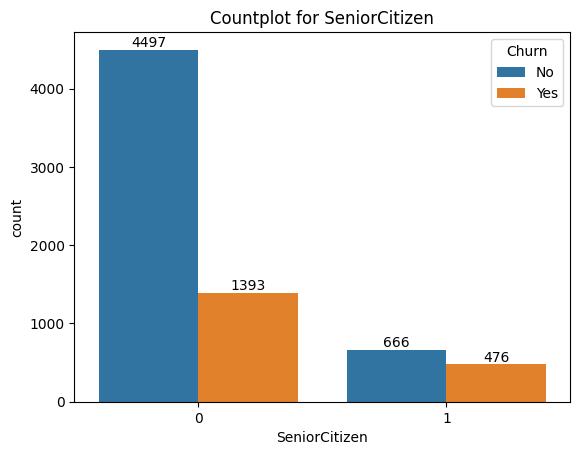

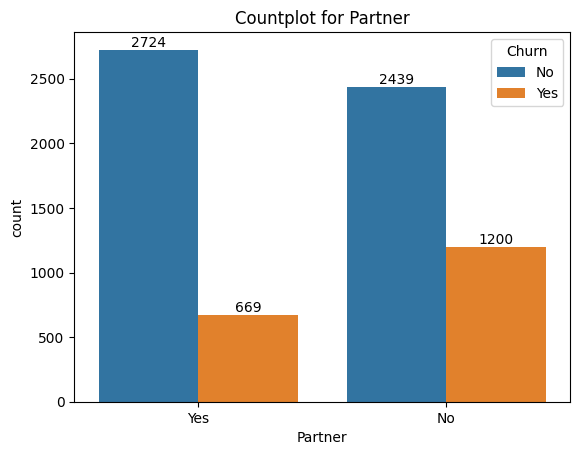

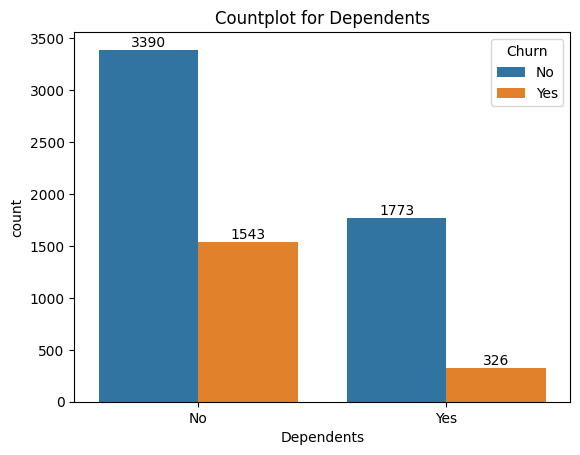

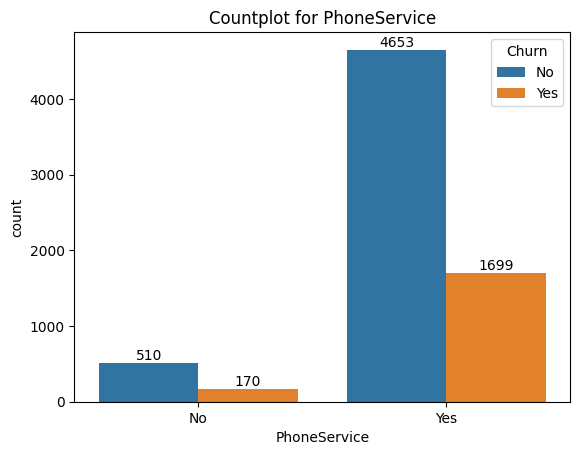

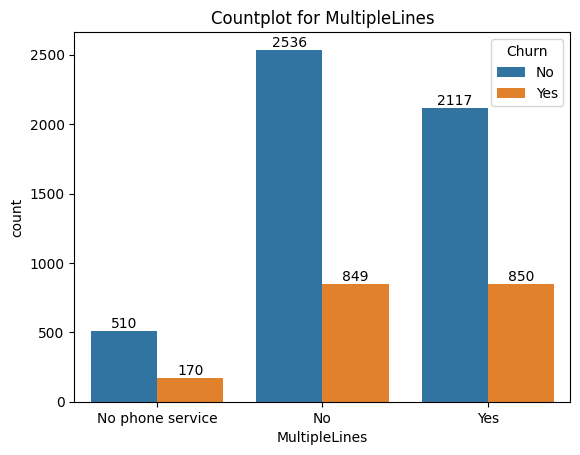

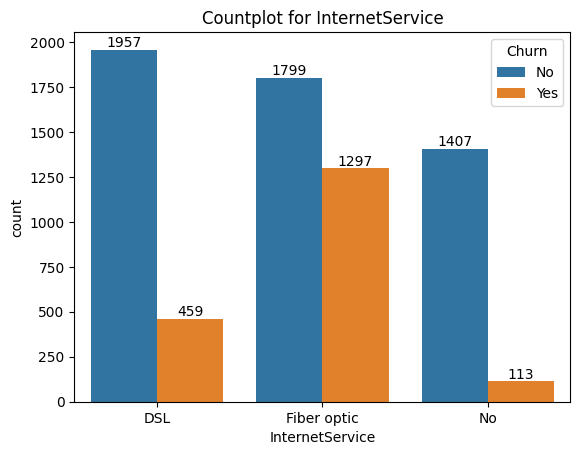

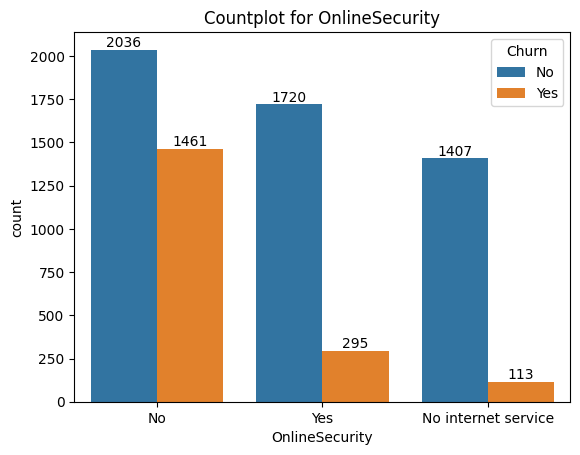

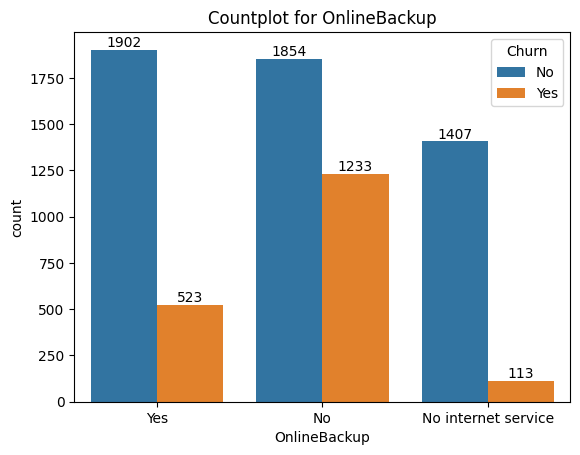

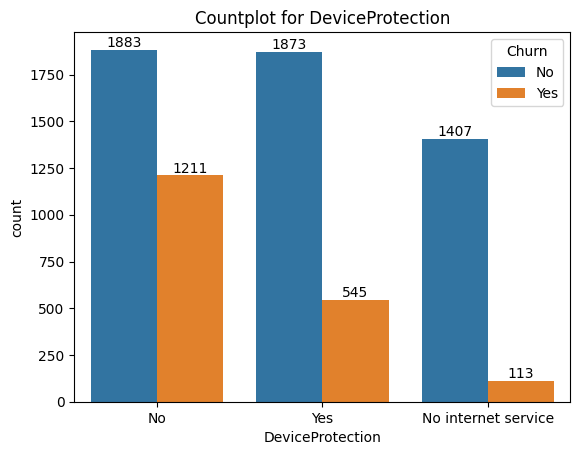

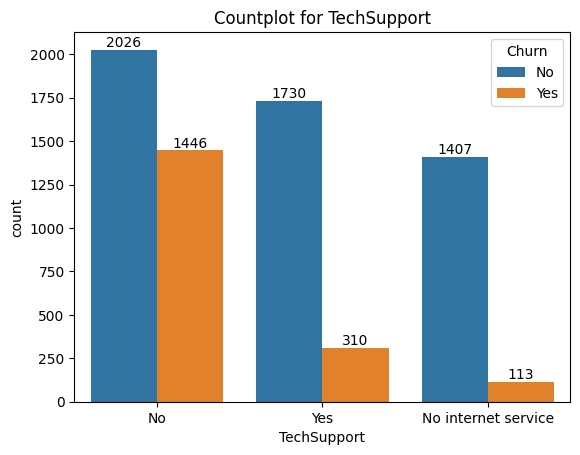

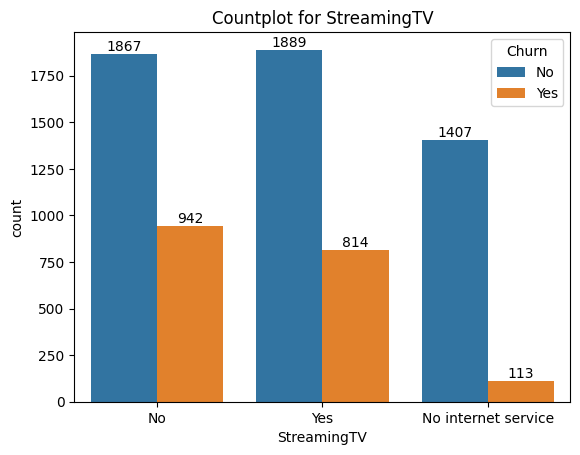

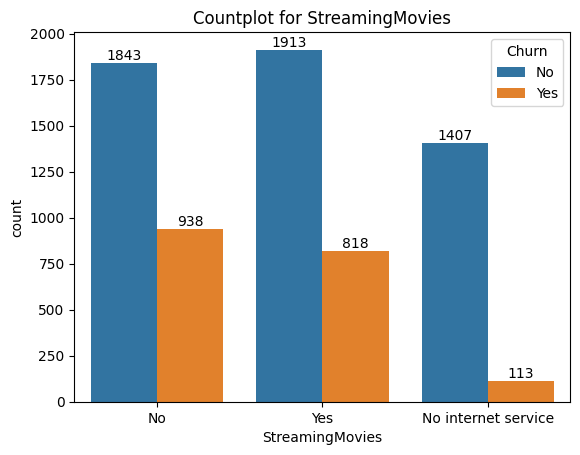

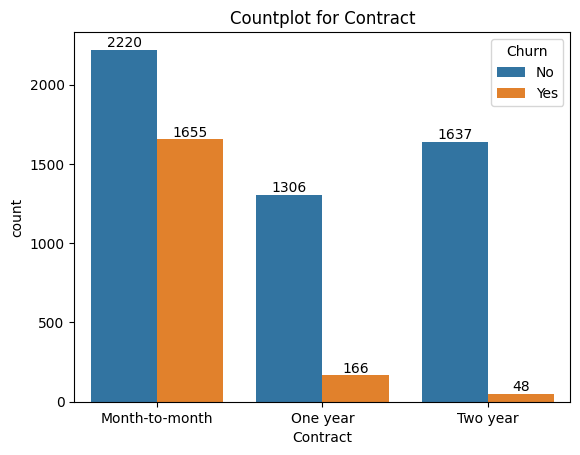

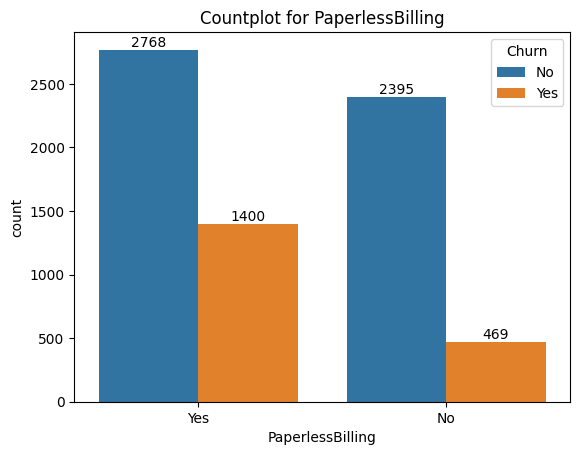

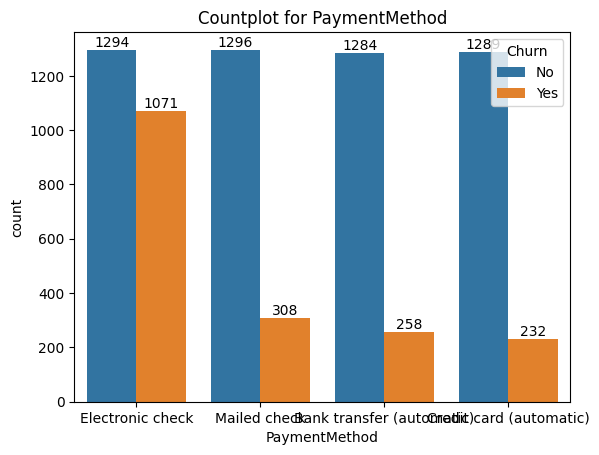

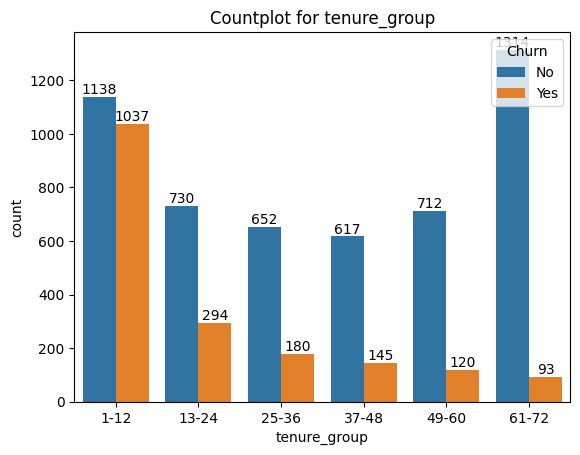

In [26]:
for i, predictor in enumerate (new_df.drop(columns=['TotalCharges','MonthlyCharges','Churn'])):
    plt.figure(i)
    ax=sns.countplot(data=new_df,x=predictor,hue='Churn')
    ax.set_xlabel(predictor)
    ax.set_ylabel('count')
    ax.set_title('Countplot for {}'.format(predictor))
    
    # Show legend
    ax.legend(title='Churn', loc='upper right')
    for bars in ax.containers:
        ax.bar_label(bars)

1.Senior citizes are more likely to churn
2. People with no partners are more likely to churn
3. Monthly customers are more likely to chrun
4. People who pay via electronic check are more likely to churn

BIVARIATE ANALYSIS


In [27]:
new_df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [46]:
#creating variable to store churned and unchurned customers
new_df_target0=new_df[new_df['Churn']== 'No']
new_df_target1= new_df[new_df['Churn']=='Yes']


In [32]:
#number of customers churned based on the gender
new_df_target1.gender.value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

In [47]:
pd.crosstab(new_df['PaymentMethod'], new_df['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


#Convert the target variable Churn in a binary numeri variable i.e yes=1: No= 0


In [48]:
new_df['Churn']=np.where(new_df.Churn == 'Yes',1,0)

In [50]:
new_df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [52]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


#Convert all categorical variable into dummy variables


In [55]:
new_df_dummies=pd.get_dummies(new_df)


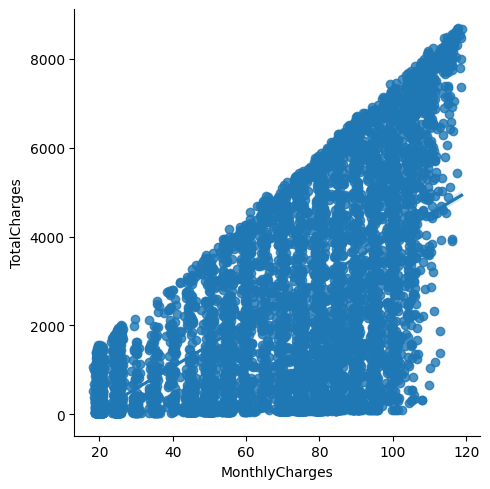

In [56]:
#checking correlation between monthly and total charges
sns.lmplot(data=new_df_dummies,x='MonthlyCharges',y='TotalCharges')

In [57]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.6510648032262025

Total charges increases as monthly charges increases - as expected

#Churn by monthly charges and Total charges


Text(0.5, 1.0, 'Monthly Charges by Churn')

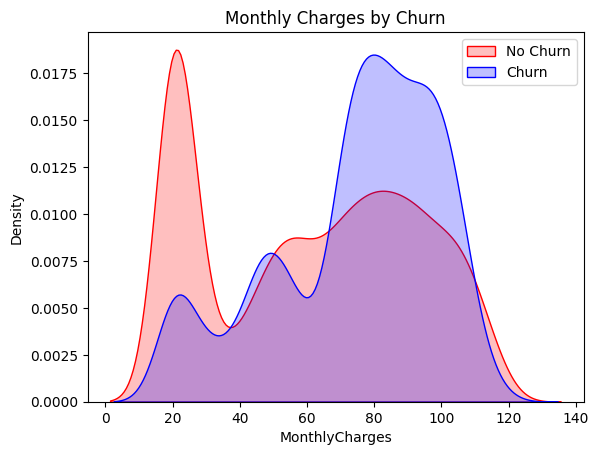

In [63]:
ax= sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==0)], color= 'Red', fill= True)
ax= sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==1)], color= 'Blue', fill= True)
ax.legend(['No Churn','Churn'], loc='upper right')
ax.set_title('Monthly Charges by Churn')

# churn is high when monthly charges are high 


Text(0.5, 1.0, 'Monthly Charges by Churn')

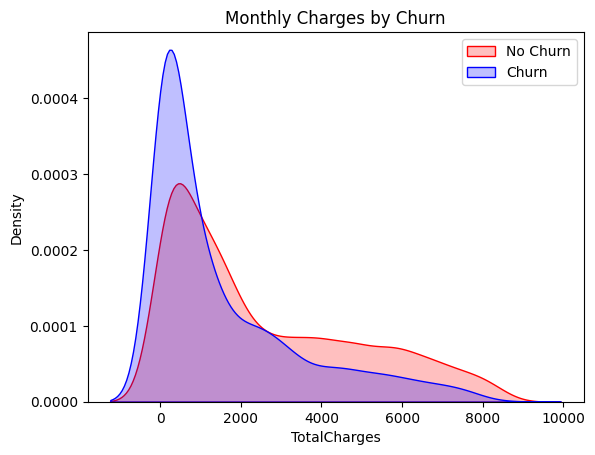

In [64]:
ax= sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']==0)], color= 'Red', fill= True)
ax= sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']==1)], color= 'Blue', fill= True)
ax.legend(['No Churn','Churn'], loc='upper right')
ax.set_title('Monthly Charges by Churn')

# Suprising insight** higher churn at lower total charges
However if we combines  insights of 3 parameters. Higher Monthly charges, Lower tenure and Lower Totalcharges are linked to HIGH CHURN

<Axes: >

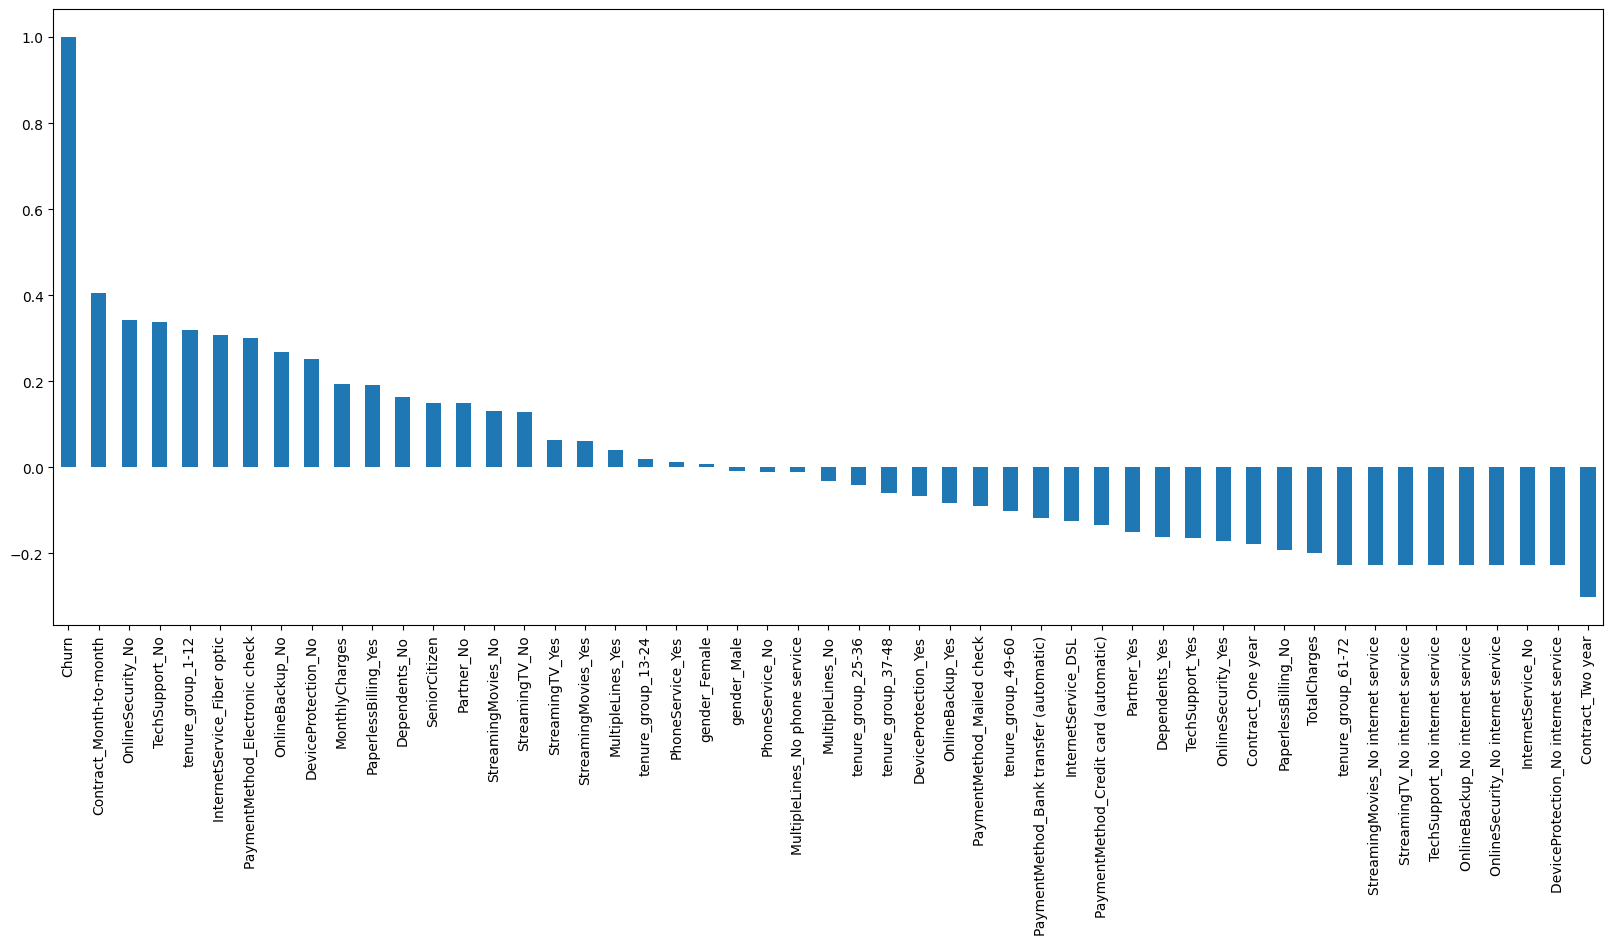

In [67]:
#Build a corr with all the predictors with CHURN
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending= False).plot(kind='bar')

# HIGH churn seen in case of Month to month contracts, no online security, no  tech support, First year of subscription and fibre optic internet 
Low CHURN is seen in case of long term contracts, subscription without internet servcie
Factor like GENDER, Avaialbility of Phone service have almost no impact on Churn


In [98]:
new_df1_target0=new_df.loc[new_df["Churn"]==0]
new_df1_target1=new_df.loc[new_df["Churn"]==1]

In [100]:
len(new_df1_target0)

5163

In [99]:
len(new_df1_target1)

1869

DataFrame shape: (1869, 20)
Unique values in column 'Partner': ['No' 'Yes']
Title: Distribution of Gender for Churned Customers
Hue: gender


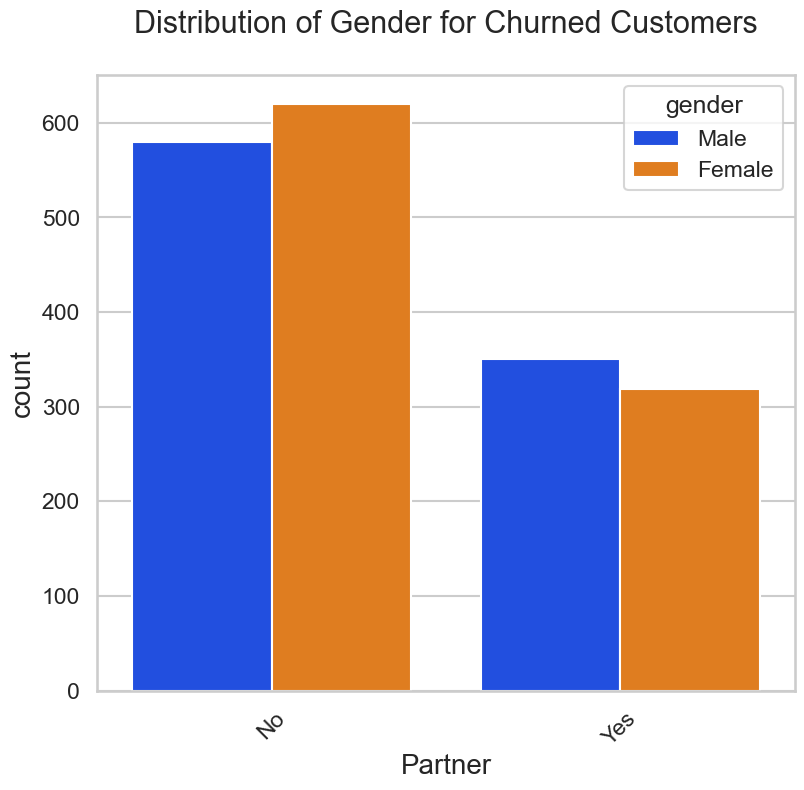

In [118]:
def uniplot(df, col, title, hue=None):
    print("DataFrame shape:", df.shape)
    print("Unique values in column '{}':".format(col), df[col].unique())
    print("Title:", title)
    print("Hue:", hue)

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    
    plt.title(title)
    
    if hue:
        ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    else:
        ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='bright')

    plt.show()

# Debugging the function call
uniplot(new_df1_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')


DataFrame shape: (1869, 20)
Unique values in column 'Partner': ['No' 'Yes']
Title: Distribution of Gender for Non Churned Customers
Hue: gender


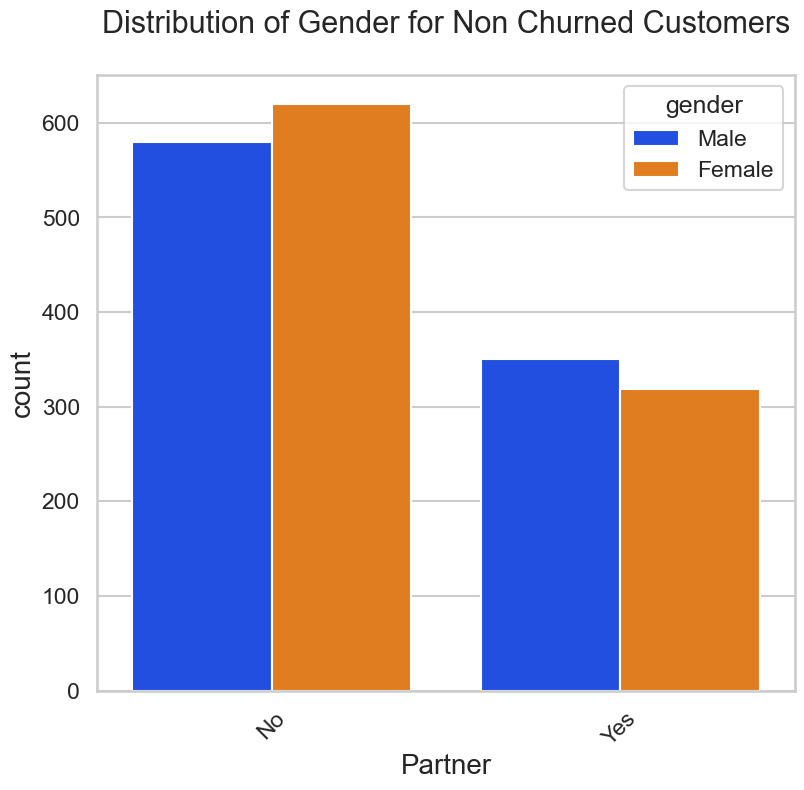

In [119]:
uniplot(new_df1_target1, col='Partner', title='Distribution of Gender for Non Churned Customers', hue='gender')

In [ ]:
CONCLUSION
These are some of the quick insights from this analysis:

Electronic check medium are the highest churners
Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
No Online security, No Tech Support category are high churners
Non senior Citizens are high churners